In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from decimal import Decimal

In [191]:
data=pd.read_csv("911.csv")

In [192]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [193]:
data.shape

(423909, 9)

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 21.0+ MB


In [195]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [196]:
data.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

# How many different types of calls.

In [197]:
def call_type(x):
    x=x.split(":")
    return x[0]    
    

In [198]:
data["Calls_type"]=data["title"].apply(call_type)

In [199]:
data["Calls_type"].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Calls_type, dtype: object

In [200]:
data['Calls_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [201]:
data["Calls_type"].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Calls_type, dtype: int64

In [202]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Calls_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#  Extract the date and time regarding the calls

In [203]:
data["timeStamp"]=pd.to_datetime(data["timeStamp"],infer_datetime_format=True)

In [204]:
data["timeStamp"].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [205]:
import datetime as dt

In [206]:
data["year"]=data["timeStamp"].dt.year

In [207]:
data["month"]=data["timeStamp"].dt.month

In [208]:
data["day"]=data["timeStamp"].dt.day

In [209]:
data["hour"]=data["timeStamp"].dt.hour

In [210]:
data["year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

In [211]:
data["month"].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [212]:
data["day"].head()

0    10
1    10
2    10
3    10
4    10
Name: day, dtype: int64

In [213]:
data["hour"].head()

0    17
1    17
2    14
3    16
4    16
Name: hour, dtype: int64

In [214]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Calls_type,year,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,12,10,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,12,10,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,12,10,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,12,10,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,12,10,16


#  How many different types of Emergency calls.

In [215]:
def emergency_type(x):
    x=x.split(":")
    return x[1]  

In [216]:
data["Emergency"]=data["title"].apply(emergency_type)

In [217]:
data["Emergency"].nunique()

92

In [218]:
data["Emergency"].value_counts().head()

 VEHICLE ACCIDENT -    98401
 DISABLED VEHICLE -    31871
 FIRE ALARM            24459
 VEHICLE ACCIDENT      24081
 FALL VICTIM           21258
Name: Emergency, dtype: int64

In [219]:
data["Emergency"].count()

423909

In [220]:
data["Emergency"].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: Emergency, dtype: object

#  At what time of day/month I can expect which type of call.

In [221]:
call_types=data["Calls_type"].value_counts()

In [222]:
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: Calls_type, dtype: int64

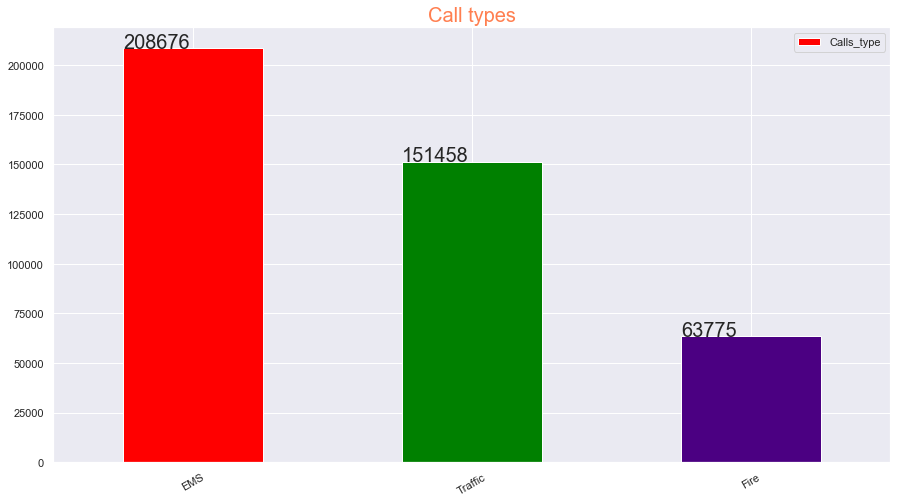

In [223]:
plt.figure(figsize=(15,8))
ax=call_types.plot.bar(color=["red","green","indigo"])
for p in ax.patches:
    ax.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()),fontsize=20)
plt.xticks(rotation=0)
plt.xticks(rotation=30)
plt.legend()
plt.title("Call types",fontsize=20,color="coral")
plt.show()

In [224]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 15 columns):
lat           423909 non-null float64
lng           423909 non-null float64
desc          423909 non-null object
zip           371780 non-null float64
title         423909 non-null object
timeStamp     423909 non-null datetime64[ns]
twp           423750 non-null object
addr          423909 non-null object
e             423909 non-null int64
Calls_type    423909 non-null object
year          423909 non-null int64
month         423909 non-null int64
day           423909 non-null int64
hour          423909 non-null int64
Emergency     423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 38.8+ MB


# Visualization with stacked bar chart

In [225]:
call_data=data.groupby(["month","Calls_type"])["Calls_type"].count()

In [226]:
call_data.head()

month  Calls_type
1      EMS           18403
       Fire           5637
       Traffic       13784
2      EMS           16587
       Fire           4894
Name: Calls_type, dtype: int64

In [227]:
call_data_percent=call_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [228]:
call_data_percent.head()

month  Calls_type
1      EMS           49.0
       Fire          15.0
       Traffic       36.0
2      EMS           51.0
       Fire          15.0
Name: Calls_type, dtype: float64

In [229]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}

In [230]:
month_order=month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [231]:
month_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Text(0.5, 1.0, 'Calls/Month')

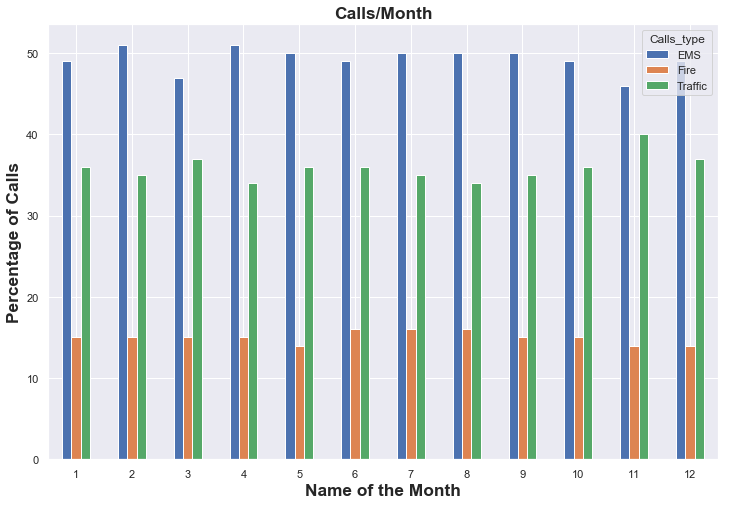

In [232]:
sns.set(rc={'figure.figsize':(12, 8)})
call_data_percent.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)

In [258]:
Hours_data= data.groupby(["hour","Calls_type"])["Calls_type"].count()

In [260]:
Hours_data.head()

hour  Calls_type
0     EMS           5263
      Fire          1341
      Traffic       2046
1     EMS           4711
      Fire          1104
Name: Calls_type, dtype: int64

In [264]:
Hours_data_percent=Hours_data.groupby(level=0).apply(lambda x:round(100*x)/float(x.sum()))

In [266]:
Hours_data_percent.head()

hour  Calls_type
0     EMS           60.843931
      Fire          15.502890
      Traffic       23.653179
1     EMS           63.826040
      Fire          14.957323
Name: Calls_type, dtype: float64

Text(0.5, 1.0, 'Calls/Hours')

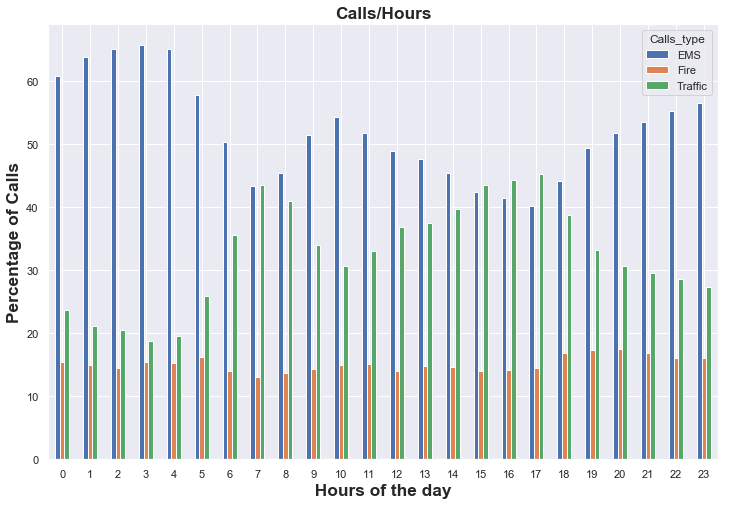

In [272]:
sns.set(rc={'figure.figsize':(12, 8)})
Hours_data_percent.unstack().plot(kind='bar')
plt.xlabel(' Hours of the day ', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Hours', fontdict=font)